In [1]:
import pandas as pd

In [10]:
import textstat

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config Completer.use_jedi = False

In [3]:
df = pd.read_csv(r"D:\data\openparliament\text_en.csv")

C:\Users\alecr\Anaconda3\envs\gensim_env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (19,22,27,28,29,30,31,32) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,id,politician_id,riding_id,party_id,end_date,start_date,id.1,document_id,time,h1_en,...,h1_fr,h2_fr,h3_fr,who_fr,who_context_fr,wordcount_en,tokenized_content,slug_length,tokens,text_en
0,2611,3465,35066,4,2005-11-29,1997-09-22,232373,1878,2001-05-03 13:50:00-04,Government Orders,...,NaN,NaN,NaN,NaN,NaN,\N,"['mr.', 'speaker', ',', 'i', 'rise', 'on', 'a'...",3,"['mr.', 'speaker', ',', 'rise', 'point', 'orde...","Mr. Speaker, I rise on a point of order. I bel..."
1,3210,3465,70224,4,1997-04-27,1994-01-17,232373,1878,2001-05-03 13:50:00-04,Government Orders,...,NaN,NaN,NaN,NaN,NaN,\N,"['mr.', 'speaker', ',', 'i', 'rise', 'on', 'a'...",3,"['mr.', 'speaker', ',', 'rise', 'point', 'orde...","Mr. Speaker, I rise on a point of order. I bel..."
2,4305,173,70358,1,\N,2015-10-19,645329,388,2008-02-14 13:15:00-05,Routine Proceedings,...,NaN,NaN,NaN,NaN,NaN,\N,"['finally', ',', 'mr.', 'speaker', ',', 'i', '...",3,"['finally', ',', 'mr.', 'speaker', ',', 'ask',...","Finally, Mr. Speaker, I ask that all remaining..."
3,1534,173,47007,1,2015-10-19,2004-10-04,645329,388,2008-02-14 13:15:00-05,Routine Proceedings,...,NaN,NaN,NaN,NaN,NaN,\N,"['finally', ',', 'mr.', 'speaker', ',', 'i', '...",3,"['finally', ',', 'mr.', 'speaker', ',', 'ask',...","Finally, Mr. Speaker, I ask that all remaining..."
4,1541,43,47014,1,2015-10-19,2004-10-04,313253,1621,2004-02-06 10:05:00-05,NaN,...,NaN,NaN,NaN,NaN,NaN,\N,"['mr.', 'speaker', ',', 'i', 'rise', 'today', ...",3,"['mr.', 'speaker', ',', 'rise', 'today', 'ques...","Mr. Speaker, I rise today on a question of pri..."


In [5]:
df.columns

Index(['id', 'politician_id', 'riding_id', 'party_id', 'end_date',
       'start_date', 'id.1', 'document_id', 'time', 'h1_en', 'h2_en',
       'member_id', 'who_en', 'content_en', 'sequence_en', 'wordcount',
       'politician_id.1', 'procedural', 'h3_en', 'who_hocid', 'content_fr',
       'statement_type', 'written_question', 'source_id', 'who_context_en',
       'slug', 'urlcache', 'h1_fr', 'h2_fr', 'h3_fr', 'who_fr',
       'who_context_fr', 'wordcount_en', 'tokenized_content', 'slug_length',
       'tokens', 'text_en'],
      dtype='object')

In [23]:
df.tokens

0         ['mr.', 'speaker', ',', 'rise', 'point', 'orde...
1         ['mr.', 'speaker', ',', 'rise', 'point', 'orde...
2         ['finally', ',', 'mr.', 'speaker', ',', 'ask',...
3         ['finally', ',', 'mr.', 'speaker', ',', 'ask',...
4         ['mr.', 'speaker', ',', 'rise', 'today', 'ques...
                                ...                        
861393    ['mr.', 'speaker', ',', 'rise', 'point', 'orde...
861394    ['mr.', 'speaker', ',', 'rise', 'point', 'orde...
861395    ['mr.', 'speaker', ',', 'rise', 'point', 'orde...
861396    ['mr.', 'speaker', ',', 'rise', 'point', 'orde...
861397    ['mr.', 'speaker', ',', 'rise', 'point', 'orde...
Name: tokens, Length: 861398, dtype: object

In [14]:
%%time
df['fk_grade'] = df.text_en.apply(textstat.flesch_kincaid_grade)

Wall time: 8min 21s


In [15]:
df.fk_grade.describe()

count    861398.000000
mean         14.377160
std          11.955241
min         -15.700000
25%           9.500000
50%          12.500000
75%          16.600000
max        1156.500000
Name: fk_grade, dtype: float64

In [ ]:
df[df.fk_grade ==df.fk_grade.median()]

In [25]:
party_colour_dict = {28:'blue',25: 'blue', 1:'blue', 46:'turquoise', 26: 'blue',2: 'orange',5: 'grey',
                4: 'red', 9: 'green', 3: 'black', 39: 'turquoise'}

In [26]:
df['party_colour'] = df.party_id.replace(party_colour_dict)

In [28]:
tips = sns.load_dataset("tips")

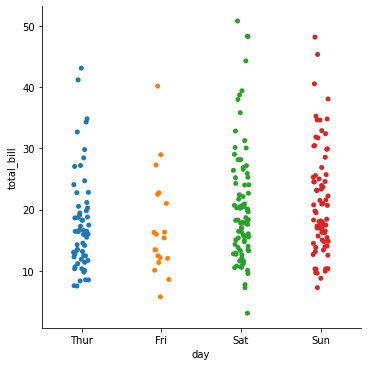

In [29]:
sns.catplot(x="day", y="total_bill", data=tips)

In [30]:
type(tips)

pandas.core.frame.DataFrame

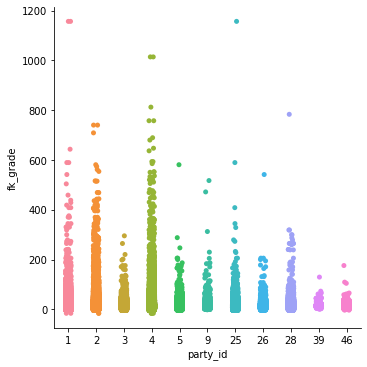

In [36]:
sns.catplot(x='party_id', y='fk_grade',data=df)